# Chapter 3 线性模型


线性模型试图学得一个通过属性之间线性组合来进行预测。即：
$$f(x)=\omega _1x_1+\omega _2x_2+ ... + \omega _dx_d + b$$
或者用向量形式写成：
$$f(x)=\boldsymbol{\omega}^T\boldsymbol{x}+b$$
当$\boldsymbol{\omega}$和$b$学得后，模型得以确认。
这种线性模型由于直观赋予各个属性在预测中的重要性，因此具有很好的可解释性。如：
$$f_{好瓜}(x)=0.2\cdot x_{色泽} + 0.5 \cdot x_{根蒂} +0.3 \cdot x_{敲声} + 1$$ 

## 线性回归

在此之前，先回顾线性代数以及前两章的内容。
### 均方误差MSE
在模型性能度量的章节中，提到回归任务最常用的性能度量是MSE，即
$$E(f;D)=\frac{1}{m}\sum _{i=1}^{m} (f(x_i) - y_i)^{2}$$

### 满秩矩阵


In [2]:
import numpy as np

def mse(model, dataset):
    """
    计算模型在给定数据集上的均方误差（Mean Squared Error, MSE）。
    参数:
    - model: 函数，用于预测输出值。
    - dataset: 列表，包含多个数据点，每个数据点是一个列表 [x1, x2, ..., xi, y]，
               其中前 n 个元素是输入特征，最后一个元素是实际输出值。
    返回:
    - float: 均方误差。
    """
    # 确保 dataset 是 numpy 数组
    dataset = np.array(dataset) if not isinstance(dataset, np.ndarray) else dataset
    
    # 初始化总误差
    total_error = 0.0
    
    # 遍历数据集中的每一个数据点
    for data in dataset:
        # 提取输入特征和实际输出值
        X = np.array(data[:-1]) if not isinstance(data[:-1], np.ndarray) else data[:-1]
        y_true = data[-1]
        
        # 使用模型进行预测
        y_pred = model(X)
        
        # 计算单个数据点的平方误差
        error = (y_pred - y_true) ** 2
        
        # 累加到总误差中
        total_error += error
    
    # 计算平均误差
    mean_squared_error = total_error / len(dataset)
    
    return mean_squared_error[0]


def is_full_rank(matrix):
    # 计算矩阵的秩
    rank = np.linalg.matrix_rank(matrix)
    
    # 矩阵的秩应该等于矩阵的最小维度
    return rank == min(matrix.shape)


def is_positive_definite(matrix):
    # 检查矩阵是否为对称矩阵
    if not np.allclose(matrix, matrix.T):
        return False
    
    # 计算矩阵的特征值
    eigenvalues = np.linalg.eigvals(matrix)
    
    # 检查所有特征值是否大于零
    return np.all(eigenvalues > 0)


2. 接下来以[MIT线性代数18.06第16讲](https://www.bilibili.com/video/BV16Z4y1U7oU/?p=16)的例子为例，进行计算mse。

Mean Squared Error (MSE): 0.05555555555555556


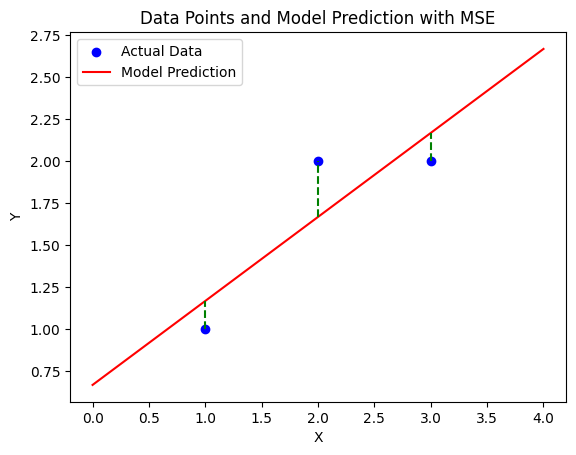

In [3]:
import matplotlib.pyplot as plt
data = [[1,1],[2,2],[3,2]]
model = lambda x: 0.66666666667 + 0.5*x

data = np.array(data)

# 计算预测值
x_values = data[:, 0]
y_actual = data[:, 1]
y_pred = model(x_values)

# 计算均方误差 (MSE)
mse = mse(model,data)
print(f"Mean Squared Error (MSE): {mse}")

# 绘制数据点
plt.scatter(x_values, y_actual, color='blue', label='Actual Data')

# 绘制预测线
x_line = np.linspace(0, 4, 100)
y_line = model(x_line)
plt.plot(x_line, y_line, color='red', label='Model Prediction')

# 绘制误差条
for i in range(len(data)):
    plt.vlines(x=x_values[i], ymin=min(y_actual[i], y_pred[i]), ymax=max(y_actual[i], y_pred[i]), colors='green', linestyles='dashed')

# 添加标签和图例
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points and Model Prediction with MSE')
plt.legend()

# 显示图形
plt.show()

In [14]:
def multivariate_linear_regression(dataset):
    # 数据集 也即 ？？？？向量想要投影到的列空间
    X = dataset[:,:-1]
    X = np.hstack([X, np.ones((X.shape[0], 1))])

    y = dataset[:,-1]
    print("X is :\n",X)
    print("y is :\n",y)

    if is_full_rank(np.dot(X.T,X)) and is_positive_definite(np.dot(X.T,X)):
        #  (X^T X)^{-1} X^T y 
        omega_star = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
        print("omega_star: ",omega_star)
        print("so the regression equation is: f(x) =",end=" ")
        for i in range(len(omega_star)-1,-1,-1):
            if i == 0:
                print(omega_star[len(omega_star) - i - 1])
            elif i == 1:
                print(omega_star[len(omega_star) - i - 1],"x +",end=" ")
            else:
                print(omega_star[len(omega_star) - i - 1],"x^",i," +",end=" ")

In [15]:
data = [[1,1],[2,2],[3,2]]
data = np.array(data)

multivariate_linear_regression(data)

X is :
 [[1. 1.]
 [2. 1.]
 [3. 1.]]
y is :
 [1 2 2]
omega_star:  [0.5        0.66666667]
so the regression equation is: f(x) = 0.4999999999999996 x + 0.666666666666667
